In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display   

%matplotlib inline

In [2]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

adult = pd.read_csv(
    URL,
    
    # specify the file encoding
    encoding="utf-8",
    
    # specify the separator in the data
    sep=",",      # comma separated values
    
    # ignore spaces after the separator
    skipinitialspace=True,
    index_col=None,
    
    # use manual headers
    header=None,
    names=[
        "age", "workclass", "fnlwgt", "education", 
        "education-num", "marital-status", "occupation",
        "relationship", "race", "sex", "capital-gain", 
        "capital-loss", "hours-per-week", "native-country",
        "wage"
    ]
)

pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 15)
display(adult)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# check overall info
adult.info()

# there is no nan values
adult.isnull().sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
wage              32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
                 ..
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage              0
Length: 15, dtype: int64

In [8]:
from pandas_profiling import ProfileReport
# from pandas_profiling.utils.cache import cache_file


ModuleNotFoundError: No module named 'pandas_profiling.utils.cache'

In [ ]:
# profile = ProfileReport(adult, title="adult__Dataset") 
profile = ProfileReport(adult, title="adult__Dataset", html={'style': {'full_width': True}})

In [7]:
# NBVAL_IGNORE_OUTPUT
# The Notebook Widgets Interface
profile.to_widgets()

In [9]:
# NBVAL_IGNORE_OUTPUT
# Or use the HTML report in an iframe
profile.to_notebook_iframe()

In [3]:
# describe features(numeric) grouped by 'wage'(goal)

groupby_wage = adult.groupby(by='wage').describe()
display(groupby_wage) 

age                                                ...  \
         count       mean        std   min   25%   50%   75%  ...   
wage                                                          ...   
<=50K  24720.0  36.783738  14.020088  17.0  25.0  34.0  46.0  ...   
>50K    7841.0  44.249841  10.519028  19.0  36.0  44.0  51.0  ...   

      hours-per-week                                          
                mean        std  min   25%   50%   75%   max  
wage                                                          
<=50K      38.840210  12.318995  1.0  35.0  40.0  40.0  99.0  
>50K       45.473026  11.012971  1.0  40.0  40.0  50.0  99.0  

[2 rows x 48 columns]

In [5]:
#let's make it organize(break down for each feature)
# check object.columns.levels : level[0] has column names
display(groupby_wage.columns.levels)
display(groupby_wage['age'].index.name)


FrozenList([['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'], ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']])

'wage'

In [6]:
# loop for groupby_wage.columns.levels[0]
for i in groupby_wage.columns.levels[0]:
    groupby_wage[i].index.name = 'wage /' + str(i)
    display(groupby_wage[i])


,count,mean,std,min,25%,50%,75%,max
wage /age,,,,,,,,
<=50K,24720.0,36.783738,14.020088,17.0,25.0,34.0,46.0,90.0
>50K,7841.0,44.249841,10.519028,19.0,36.0,44.0,51.0,90.0


,count,mean,std,min,25%,50%,75%,max
wage /fnlwgt,,,,,,,,
<=50K,24720.0,190340.86517,106482.271195,12285.0,117606.0,179465.0,239023.0,1484705.0
>50K,7841.0,188005.00000,102541.775472,14878.0,119101.0,176101.0,230959.0,1226583.0


,count,mean,std,min,25%,50%,75%,max
wage /education-num,,,,,,,,
<=50K,24720.0,9.595065,2.436147,1.0,9.0,9.0,10.0,16.0
>50K,7841.0,11.611657,2.385129,2.0,10.0,12.0,13.0,16.0


,count,mean,std,min,25%,50%,75%,max
wage /capital-gain,,,,,,,,
<=50K,24720.0,148.752468,963.139307,0.0,0.0,0.0,0.0,41310.0
>50K,7841.0,4006.142456,14570.378951,0.0,0.0,0.0,0.0,99999.0


,count,mean,std,min,25%,50%,75%,max
wage /capital-loss,,,,,,,,
<=50K,24720.0,53.142921,310.755769,0.0,0.0,0.0,0.0,4356.0
>50K,7841.0,195.001530,595.487574,0.0,0.0,0.0,0.0,3683.0


,count,mean,std,min,25%,50%,75%,max
wage /hours-per-week,,,,,,,,
<=50K,24720.0,38.840210,12.318995,1.0,35.0,40.0,40.0,99.0
>50K,7841.0,45.473026,11.012971,1.0,40.0,40.0,50.0,99.0


In [7]:
# mean summary
adult.groupby(by='wage').mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
wage,,,,,,
<=50K,36.783738,190340.86517,9.595065,148.752468,53.142921,38.840210
>50K,44.249841,188005.00000,11.611657,4006.142456,195.001530,45.473026


In [8]:
# categorical varibales check
design_matrix_race = pd.get_dummies(adult['race'], drop_first=True) # drop_first: for dummy trap(one variable can be predicted from the others)
design_matirx_sex = pd.get_dummies(adult['sex'], drop_first=True)
## creating intercept
intercept = pd.DataFrame(1,index = np.arange(adult.shape[0]), columns = ['(Intercept)'])
example_design_matrix = pd.concat([intercept,design_matrix_race, design_matirx_sex,adult['age']], axis = 1)

print('example:')
display(example_design_matrix)
print('\n')
# original matirx
print('original: ')
display(adult[['race','sex','age']]) # looks good

example:


,(Intercept),Asian-Pac-Islander,Black,Other,White,Male,age
0,1,0,0,0,1,1,39
1,1,0,0,0,1,1,50
2,1,0,0,0,1,1,38
3,1,0,1,0,0,1,53
4,1,0,1,0,0,0,28
...,...,...,...,...,...,...,...
32556,1,0,0,0,1,0,27
32557,1,0,0,0,1,1,40
32558,1,0,0,0,1,0,58
32559,1,0,0,0,1,1,22




original: 


,race,sex,age
0,White,Male,39
1,White,Male,50
2,White,Male,38
3,Black,Male,53
4,Black,Female,28
...,...,...,...
32556,White,Female,27
32557,White,Male,40
32558,White,Female,58
32559,White,Male,22


In [9]:
# convert all of categorical features using one-hot encoding
obj_df = adult.select_dtypes(include = ['object']).drop('wage', axis=1)
int_df = adult.select_dtypes(include = ['int64'])

design_matrix_obj = pd.get_dummies(obj_df, drop_first=True)
design_matrix_adult = pd.concat([intercept, design_matrix_obj, int_df], axis = 1)
display(design_matrix_adult)


,(Intercept),workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Yugoslavia,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,1,0,0,0,0,0,0,...,0,39,77516,13,2174,0,40
1,1,0,0,0,0,0,1,...,0,50,83311,13,0,0,13
2,1,0,0,0,1,0,0,...,0,38,215646,9,0,0,40
3,1,0,0,0,1,0,0,...,0,53,234721,7,0,0,40
4,1,0,0,0,1,0,0,...,0,28,338409,13,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,1,0,0,0,1,0,0,...,0,27,257302,12,0,0,38
32557,1,0,0,0,1,0,0,...,0,40,154374,9,0,0,40
32558,1,0,0,0,1,0,0,...,0,58,151910,9,0,0,40
32559,1,0,0,0,1,0,0,...,0,22,201490,9,0,0,20


In [10]:
# training, validatation, test set

''' we can use sklearn.model_selection
<using sklearn>
    from sklearn.model_selection import train_test_split
    training, test = train_test_split(adult, test_size=0.2)
    training, validation = train_test_split(training, test_size=0.25)
    print(training.shape)
    print(validation.shape)
    print(test.shape)
'''
np.random.seed(1709)
n= adult.shape[0]
idx = np.arange(n)
np.random.shuffle(idx)

training_size = int(n*0.6)
validate_size = int(n*0.2)

training_idx = idx[:training_size]
validate_idx = idx[training_size:training_size+validate_size]
test_idx = idx[training_size+validate_size:]

training = adult.loc[training_idx]
validation = adult.loc[validate_idx]
test = adult.loc[test_idx]
print(training.shape)
print(validation.shape)
print(test.shape)

(19536, 15)
(6512, 15)
(6513, 15)


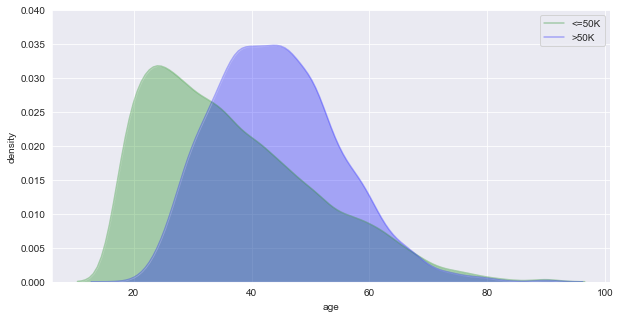

In [11]:
# vidualization
# age
fig1 = plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")

ax1 = fig1.add_subplot(1,1,1)
ax1.set_xlabel("age")
ax1.set_ylabel("density")
ax1.set_ylim(0, 0.04)

df1 = training[training["wage"] == "<=50K"]
df2 = training[training["wage"] == ">50K"]

sns.distplot(df1["age"], ax=ax1, hist=False,
             kde_kws={"alpha": .3, "color": "g",
                      "shade": True, "label": "<=50K"})
sns.distplot(df2["age"], ax=ax1, hist=False,
             kde_kws={"alpha": .3, "color": "b",
                      "shade": True, "label": ">50K"})
plt.show()


## findings:
1. age [:25], there are more people make less than 50k.
2. age around 37, it starts to have more people make more than 50k and it stays up to age 65.
3. after age 65, people who makes less than 50k gets more.
### it seem not like linear relationship between age and wage. Not sure legacy models such as logistic regression or Lasso can capture these variences well enough.  

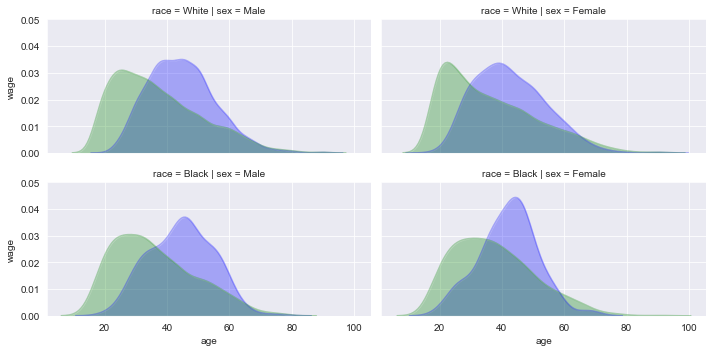

In [12]:
# white vs balck (FaceGrid like facet in R )
mask = (training["race"] == "White") | (training["race"] == "Black")
df3 = training.loc[mask]

g = sns.FacetGrid(df3, row="race", col="sex", hue="wage",
                  hue_kws={"color": ["b", "g"]},
                  height = 2.5,
                  aspect =2)

g.set(ylim=(0, .05))
g.map(sns.distplot, "age", "wage", hist=False,
      kde_kws={"alpha": .3, "shade": True})


plt.show()

## findings: 
1. In male, there is not much difference between white and black.
2. In female, the range of age that people make more than 50k is much different.
3. In white, range of age who make more than 50k, it is [30 to 65] and it gradually decrease
4. In black, range of age who make more than 50k,it is [36 to 58] and it sharply decrease
5. range of age who make less than 50k is much narrower in white when in young age(20s), but it goes gradually decrased in black. 

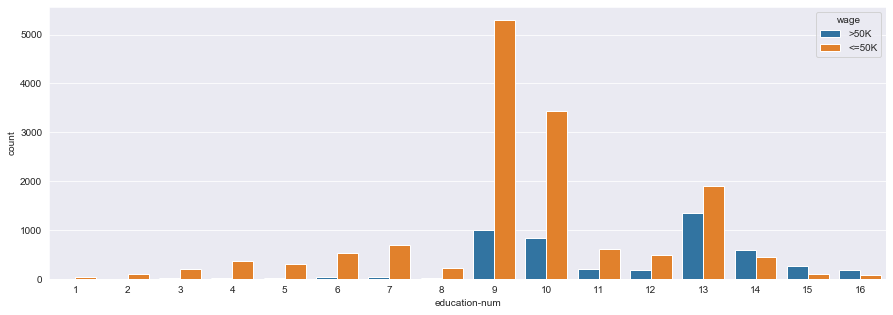

In [13]:
# eudcation number
fig3 = plt.figure(figsize=(15, 5))
ax3 = fig3.add_subplot(1,1,1)
sns.countplot(x="education-num", hue="wage", data=training, ax=ax3)

plt.show()

## findings:
1. Hihger education number gets higher ratio of people who makes more than 50k.